<a href="https://colab.research.google.com/github/bella470/Python_Class_DST/blob/main/ProjectFuelConsumption_NLReg_23072024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 06:21:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2024-07-23 06:21:41 (28.2 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [2]:
import pandas as pd
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.corr(numeric_only = True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


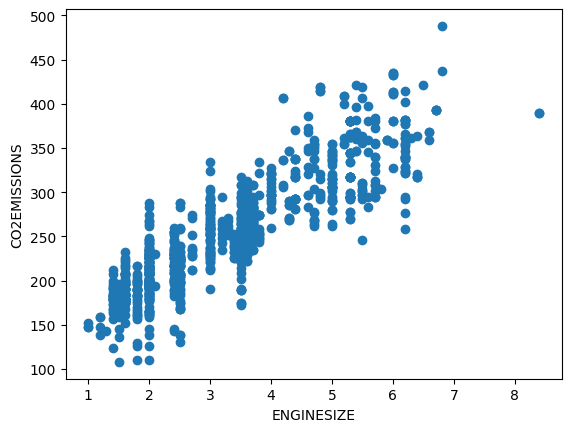

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [5]:
import numpy as np

msk = np.random.rand(len(df)) < 0.75

train = df[msk]
test = df[~msk]

**Polynomial Regression**

$$y = b + \theta\_1  x + \theta\_2 x^2$$

In [6]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

#testing the model
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  74.00591693379816
The MSE is:  888.6129913609476


Text(0, 0.5, 'Emission')

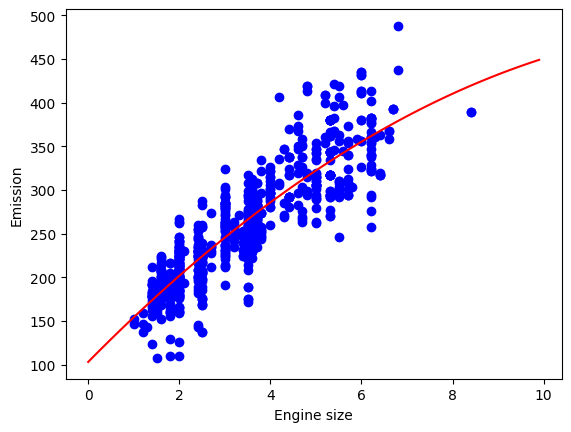

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [8]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
poly4 = PolynomialFeatures(degree=4)
train_x_poly = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()
train_y_ = clf4.fit(train_x_poly, train_y)

test_x_poly = poly4.fit_transform(test_x)
test_y_ = clf4.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  74.1005062738152
The MSE is:  885.3794356256162


Text(0, 0.5, 'Emission')

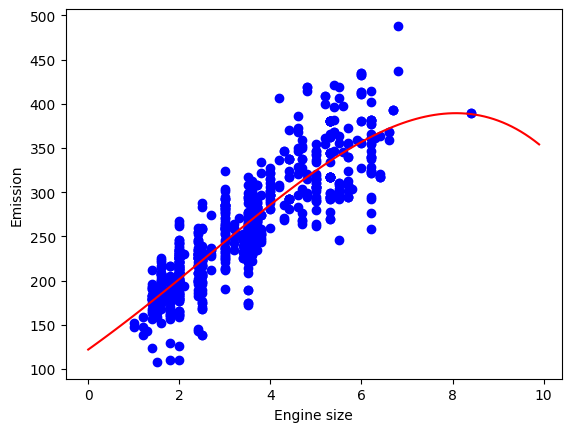

In [9]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4) #+ clf4.coef_[0][5]*np.power(XX, 5) + clf4.coef_[0][6]*np.power(XX, 6) + clf4.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [10]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
poly3 = PolynomialFeatures(degree=2)
train_x_poly = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y_ = clf3.fit(train_x_poly, train_y)

#testing the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly3.fit_transform(test_x)
test_y_ = clf3.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  81.45938706033984
The MSE is:  633.814606347807


Text(0, 0.5, 'Emission')

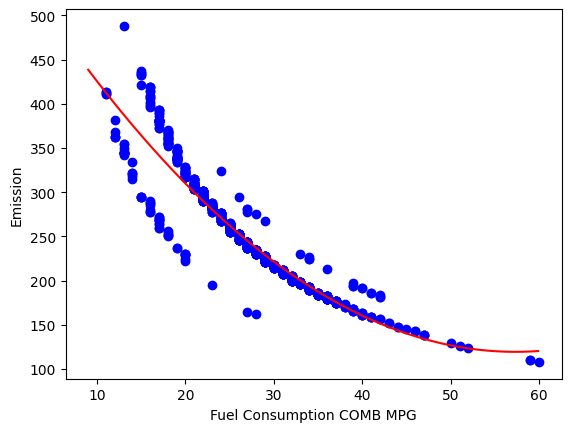

In [11]:
plt.scatter(train['FUELCONSUMPTION_COMB_MPG'], train['CO2EMISSIONS'],  color='blue')
XX = np.arange(9.0, 60.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) #clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption COMB MPG")
plt.ylabel("Emission")

In [12]:
#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
poly3 = PolynomialFeatures(degree=7)
train_x_poly = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y_ = clf3.fit(train_x_poly, train_y)

test_x_poly = poly3.fit_transform(test_x)
test_y_ = clf3.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  82.71781148926016
The MSE is:  590.7951125138986


Text(0, 0.5, 'Emission')

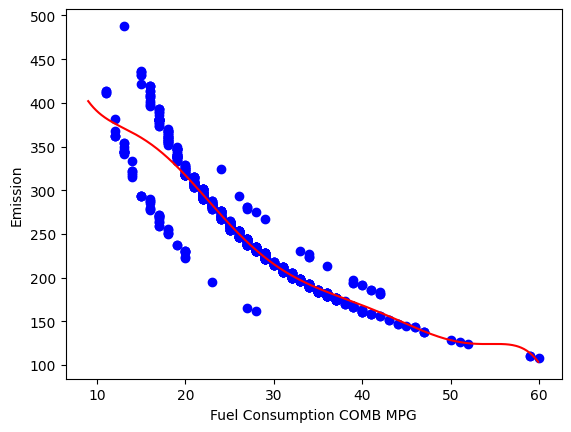

In [13]:
plt.scatter(train['FUELCONSUMPTION_COMB_MPG'], train['CO2EMISSIONS'],  color='blue')
XX = np.arange(9.0, 60.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3) + clf3.coef_[0][4]*np.power(XX, 4) +clf3.coef_[0][5]*np.power(XX, 5) + clf3.coef_[0][6]*np.power(XX, 6) + clf3.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption COMB MPG")
plt.ylabel("Emission")

In [14]:
#training the model
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
polyCy = PolynomialFeatures(degree=4)
train_x_poly = polyCy.fit_transform(train_x)

clfCy = linear_model.LinearRegression()
train_y_ = clfCy.fit(train_x_poly, train_y)

#testing the model
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = polyCy.fit_transform(test_x)
test_y_ = clfCy.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  72.82171040202843
The MSE is:  929.0953313575183


Text(0, 0.5, 'Emission')

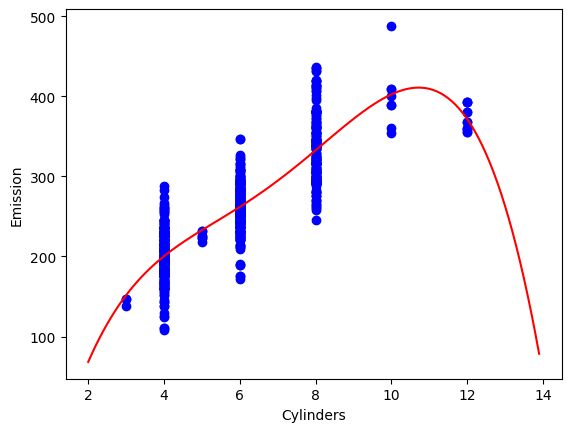

In [15]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
XX = np.arange(2.0, 14.0, 0.1)
yy = clfCy.intercept_[0]+ clfCy.coef_[0][1]*XX + clfCy.coef_[0][2]*np.power(XX, 2) + clfCy.coef_[0][3]*np.power(XX, 3) + clfCy.coef_[0][4]*np.power(XX, 4) #+ clf4.coef_[0][5]*np.power(XX, 5) + clf4.coef_[0][6]*np.power(XX, 6) + clf4.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("Cylinders")
plt.ylabel("Emission")

In [16]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
polyFc = PolynomialFeatures(degree=4)
train_x_poly = polyFc.fit_transform(train_x)

clfFc = linear_model.LinearRegression()
train_y_ = clfFc.fit(train_x_poly, train_y)

#testing the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = polyFc.fit_transform(test_x)
test_y_ = clfFc.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  83.10566731486924
The MSE is:  577.5361826053693


Text(0, 0.5, 'Emission')

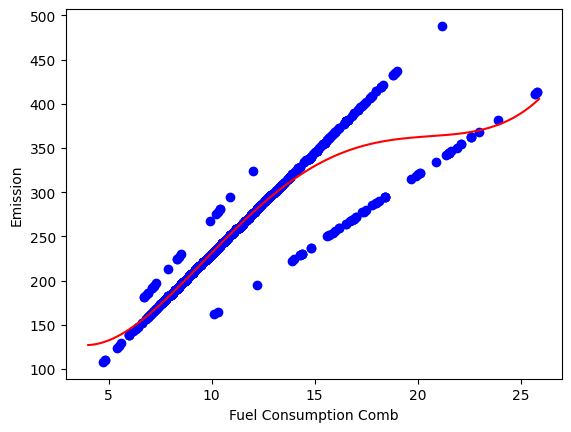

In [17]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
XX = np.arange(4.0, 26.0, 0.1)
yy = clfFc.intercept_[0]+ clfFc.coef_[0][1]*XX + clfFc.coef_[0][2]*np.power(XX, 2) + clfFc.coef_[0][3]*np.power(XX, 3) + clfFc.coef_[0][4]*np.power(XX, 4) #+ clf4.coef_[0][5]*np.power(XX, 5) + clf4.coef_[0][6]*np.power(XX, 6) + clf4.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")

**Multiple Polynomial**

In [25]:
#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#default degree is 2, how sensitive is the curve line to the distribution
#the higher the degree, more sensitive to the data
polyMu = PolynomialFeatures(degree=3)
train_x_poly = polyMu.fit_transform(train_x)

clfMu = linear_model.LinearRegression()
train_y_ = clfMu.fit(train_x_poly, train_y)

#testing the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = polyMu.fit_transform(test_x)
test_y_ = clfMu.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 score is: ', (r2_score(test_y, test_y_))*100)
print('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2 score is:  83.08291748196983
The MSE is:  578.3138902480744


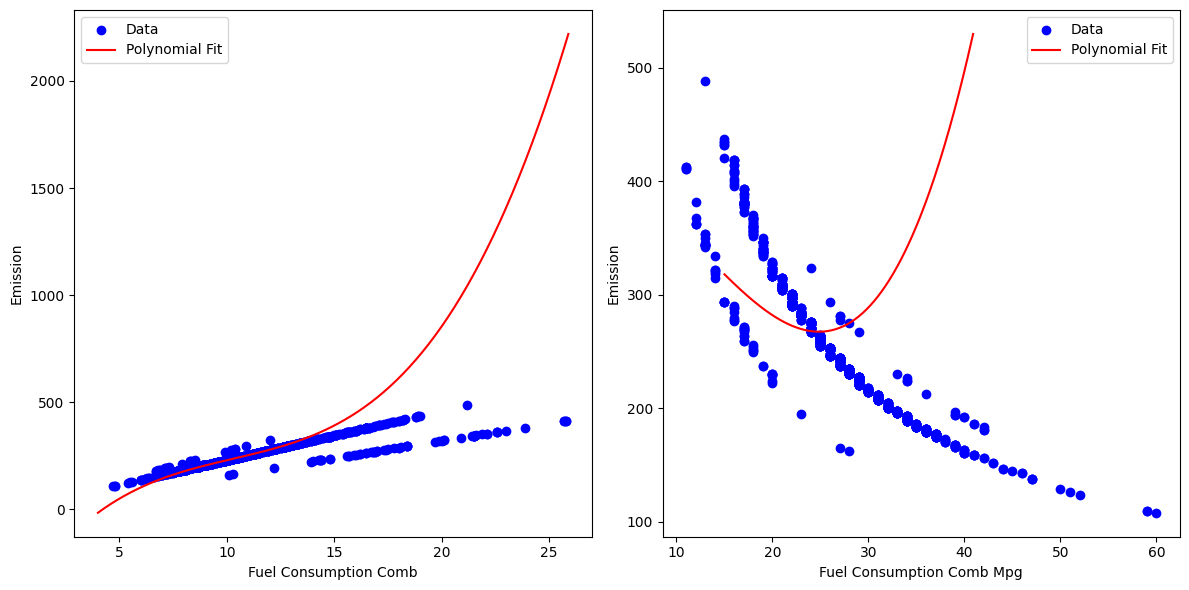

In [28]:
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot for FUELCONSUMPTION_COMB
plt.subplot(1, 2, 1)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='blue', label='Data')
XX = np.arange(4.0, 26.0, 0.1).reshape(-1, 1)

# Transform XX to include the second feature which should be constant for this plot
XX_poly = np.hstack([XX, np.full_like(XX, train['FUELCONSUMPTION_COMB_MPG'].mean())])
XX_poly_transformed = polyMu.transform(XX_poly)
yy = clfMu.predict(XX_poly_transformed)
plt.plot(XX, yy, '-r', label='Polynomial Fit')
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("Emission")
plt.legend()

# Plot for FUELCONSUMPTION_COMB_MPG
plt.subplot(1, 2, 2)
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS, color='blue', label='Data')
XX = np.arange(15.0, 41.0, 0.1).reshape(-1, 1)

# Transform XX to include the first feature which should be constant for this plot
XX_poly = np.hstack([np.full_like(XX, train['FUELCONSUMPTION_COMB'].mean()), XX])
XX_poly_transformed = polyMu.transform(XX_poly)
yy = clfMu.predict(XX_poly_transformed)
plt.plot(XX, yy, '-r', label='Polynomial Fit')
plt.xlabel("Fuel Consumption Comb Mpg")
plt.ylabel("Emission")
plt.legend()

plt.tight_layout()
plt.show()